# Assignment-2

# **Convolution **

** Uploading the data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Transferring images into training, validation, and testing folders**

In [ ]:
import os
import shutil
import pathlib

# Define original folders separately
source_train_dir = pathlib.Path("/content/drive/MyDrive/cats_vs_dogs_small/train")
source_validation_dir = pathlib.Path("/content/drive/MyDrive/cats_vs_dogs_small/validation")
source_test_dir = pathlib.Path("/content/drive/MyDrive/cats_vs_dogs_small/test")

# Define destination base directory
target_dataset_dir = pathlib.Path("/content/drive/MyDrive/cats_vs_dogs_small/small_dataset_balanced")

def create_dataset_subset(subset_name, original_folder, start_index, end_index):

    print(f"\nCreating '{subset_name}' from {original_folder} indices {start_index} to {end_index}")

    for category in ["cats", "dogs"]:
        src_dir = original_folder / category
        dest_dir = target_dataset_dir / subset_name / category

        os.makedirs(dest_dir, exist_ok=True)

        files = sorted(os.listdir(src_dir))


        if end_index > len(files):
            print(f"WARNING: end_index {end_index} exceeds available files ({len(files)}). Adjusting.")
            end_index = len(files)

        subset_files = files[start_index:end_index]
        print(f"Copying {len(subset_files)} '{category}' images to '{dest_dir}'...")

        for fname in subset_files:
            src_file = src_dir / fname
            dst_file = dest_dir / fname
            shutil.copyfile(src_file, dst_file)

    print(f" {subset_name} created from {original_folder}.")

def main():



    create_dataset_subset("train", source_train_dir, 0, 500)
    create_dataset_subset("validation", source_validation_dir, 0, 250)
    create_dataset_subset("test", 	source_test_dir, 0, 250)

if __name__ == "__main__":
    main()



Creating 'train' from /content/drive/MyDrive/cats_vs_dogs_small/train indices 0 to 500
Copying 500 'cats' images to '/content/drive/MyDrive/cats_vs_dogs_small/small_dataset_balanced/train/cats'...
Copying 500 'dogs' images to '/content/drive/MyDrive/cats_vs_dogs_small/small_dataset_balanced/train/dogs'...
 train created from /content/drive/MyDrive/cats_vs_dogs_small/train.

Creating 'validation' from /content/drive/MyDrive/cats_vs_dogs_small/validation indices 0 to 250
Copying 250 'cats' images to '/content/drive/MyDrive/cats_vs_dogs_small/small_dataset_balanced/validation/cats'...
Copying 250 'dogs' images to '/content/drive/MyDrive/cats_vs_dogs_small/small_dataset_balanced/validation/dogs'...
 validation created from /content/drive/MyDrive/cats_vs_dogs_small/validation.

Creating 'test' from /content/drive/MyDrive/cats_vs_dogs_small/test indices 0 to 250
Copying 250 'cats' images to '/content/drive/MyDrive/cats_vs_dogs_small/small_dataset_balanced/test/cats'...
Copying 250 'dogs' im

In [ ]:
create_dataset_subset("train", source_train_dir, 0, 500)
create_dataset_subset("validation", source_validation_dir, 0, 250)
create_dataset_subset("test", 	source_test_dir, 0, 250)



Creating 'train' from /content/drive/MyDrive/cats_vs_dogs_small/train indices 0 to 500
Copying 500 'cats' images to '/content/drive/MyDrive/cats_vs_dogs_small/small_dataset_balanced/train/cats'...
Copying 500 'dogs' images to '/content/drive/MyDrive/cats_vs_dogs_small/small_dataset_balanced/train/dogs'...
 train created from /content/drive/MyDrive/cats_vs_dogs_small/train.

Creating 'validation' from /content/drive/MyDrive/cats_vs_dogs_small/validation indices 0 to 250
Copying 250 'cats' images to '/content/drive/MyDrive/cats_vs_dogs_small/small_dataset_balanced/validation/cats'...
Copying 250 'dogs' images to '/content/drive/MyDrive/cats_vs_dogs_small/small_dataset_balanced/validation/dogs'...
 validation created from /content/drive/MyDrive/cats_vs_dogs_small/validation.

Creating 'test' from /content/drive/MyDrive/cats_vs_dogs_small/test indices 0 to 250
Copying 250 'cats' images to '/content/drive/MyDrive/cats_vs_dogs_small/small_dataset_balanced/test/cats'...
Copying 250 'dogs' im

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_ds = image_dataset_from_directory(
    target_dataset_dir / "train",
    image_size=(180, 180),
    batch_size=32
)

val_ds = image_dataset_from_directory(
    target_dataset_dir / "validation",
    image_size=(180, 180),
    batch_size=32
)

test_ds = image_dataset_from_directory(
    target_dataset_dir / "test",
    image_size=(180, 180),
    batch_size=32
)



Found 1000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


# **Training a convent neural network from the beginning**

**Model 1:The dataset consists of 1000 samples for training, 500 for validation, and 500 for testing.**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers


**Building a simple ConvNet to distinguish between dogs and cats.**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

**Setting up the model for training**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Data preparation**

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

# Base directory for the subsets
balanced_subset_dir = pathlib.Path("/content/drive/MyDrive/cats_vs_dogs_small/small_dataset_balanced")

# Load datasets
train_ds = image_dataset_from_directory(
    balanced_subset_dir / "train",
    image_size=(180, 180),
    batch_size=32
)

val_ds = image_dataset_from_directory(
    balanced_subset_dir / "validation",
    image_size=(180, 180),
    batch_size=32
)

test_ds = image_dataset_from_directory(
    balanced_subset_dir / "test",
    image_size=(180, 180),
    batch_size=32
)

Found 1000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [ ]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [ ]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [ ]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


**Showing the dimensions of the data and labels returned by the Dataset**

In [ ]:
for data_batch, labels_batch in train_ds:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Training the model with a dataset**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_ds,
    epochs=30,
    validation_data=val_ds,
    callbacks=callbacks)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 309ms/step - accuracy: 0.4607 - loss: 0.7651 - val_accuracy: 0.5020 - val_loss: 0.6917
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 182ms/step - accuracy: 0.5038 - loss: 0.6964 - val_accuracy: 0.5000 - val_loss: 0.7021
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 204ms/step - accuracy: 0.5436 - loss: 0.6923 - val_accuracy: 0.5000 - val_loss: 0.8871
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 184ms/step - accuracy: 0.5528 - loss: 0.7245 - val_accuracy: 0.5500 - val_loss: 0.6801
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - accuracy: 0.5543 - loss: 0.6774 - val_accuracy: 0.6020 - val_loss: 0.7410
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 183ms/step - accuracy: 0.5525 - loss: 0.6972 - val_accuracy: 0.5860 - val_loss: 0.7698
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 177ms/step - accuracy: 0.6323 - loss: 0.6582 - val_accuracy: 0.6300 - val_loss: 0.6608
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step - accuracy: 0.6423 - loss: 0.6288 - val_accur

**Visualizing the loss and accuracy trends throughout training**

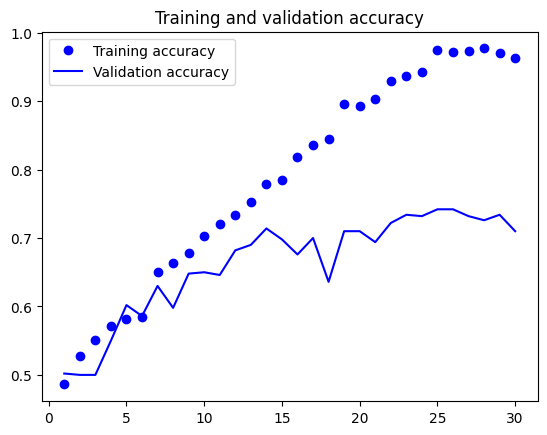

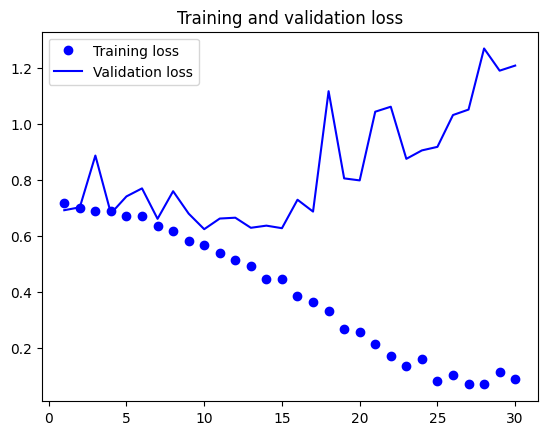

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Assessing the model's performance on the test set**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accuracy: 0.6020 - loss: 0.6741
Test accuracy: 0.608


Since the validation and the tes accuracy of the model is very low that is 68%

To improve performance in developing a network that we trained from scratch, we will train our model on following techniques.

**Model 1a: Applying Data Augmentation**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_ds,
    epochs=30,
    validation_data=val_ds,
     callbacks=callbacks)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 227ms/step - accuracy: 0.4829 - loss: 0.6984 - val_accuracy: 0.5000 - val_loss: 0.7005
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 181ms/step - accuracy: 0.5042 - loss: 0.6965 - val_accuracy: 0.5000 - val_loss: 0.8050
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 196ms/step - accuracy: 0.5372 - loss: 0.6985 - val_accuracy: 0.6000 - val_loss: 0.6774
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 180ms/step - accuracy: 0.5754 - loss: 0.6863 - val_accuracy: 0.5020 - val_loss: 0.6856
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - accuracy: 0.5655 - loss: 0.6862 - val_accuracy: 0.5660 - val_loss: 0.6853
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 151ms/step - accuracy: 0.5898 - loss: 0.6753 - val_accuracy: 0.5000 - val_loss: 1.1144
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 220ms/step - accuracy: 0.5984 - loss: 0.6854 - val_accuracy: 0.6520 - val_loss: 0.6308
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 177ms/step - accuracy: 0.6298 - loss: 0.6545 - val_accuracy: 

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.7121 - loss: 0.5589
Test accuracy: 0.720


**Creating a data augmentation step for an image model**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Showing a selection of randomly augmented training images**

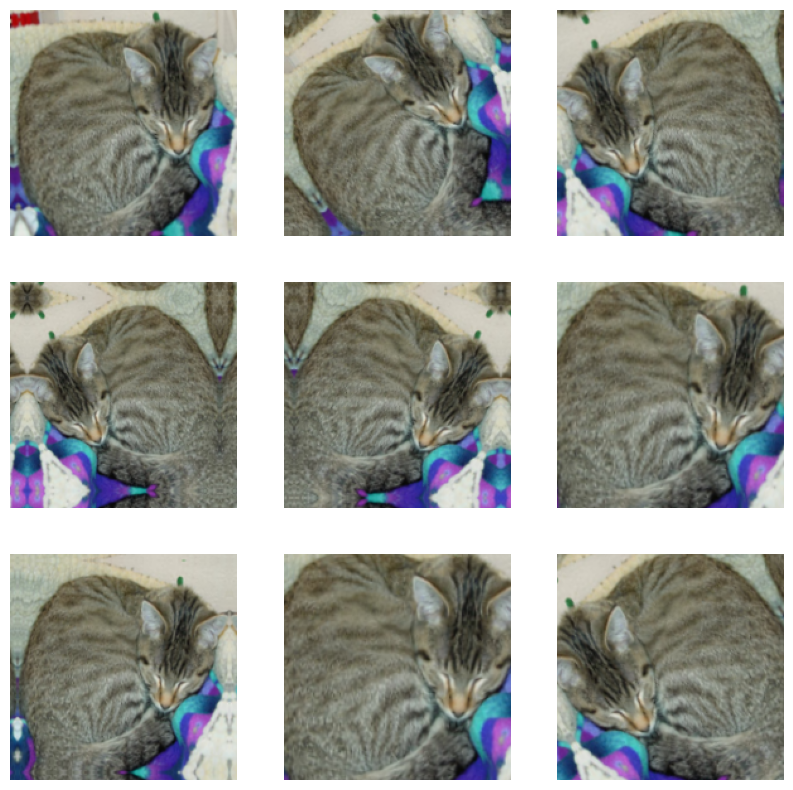

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Model 1b: Applying the Dropout Technique**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_dropout.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_ds,
    epochs=30,
    validation_data=val_ds,
    callbacks=callbacks)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 246ms/step - accuracy: 0.4900 - loss: 0.7026 - val_accuracy: 0.5000 - val_loss: 0.6925
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - accuracy: 0.5098 - loss: 0.6926 - val_accuracy: 0.5320 - val_loss: 0.6911
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 182ms/step - accuracy: 0.5546 - loss: 0.7005 - val_accuracy: 0.5000 - val_loss: 2.7615
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 185ms/step - accuracy: 0.5684 - loss: 0.9235 - val_accuracy: 0.6140 - val_loss: 0.6525
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step - accuracy: 0.5729 - loss: 0.6785 - val_accuracy: 0.5040 - val_loss: 0.7390
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 167ms/step - accuracy: 0.5996 - loss: 0.6562 - val_accuracy: 0.5060 - val_loss: 0.9531
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.5937 - loss: 0.7093 - val_accuracy: 0.6200 - val_loss: 0.6487
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 183ms/step - accuracy: 0.6725 - loss: 0.6189 - val_accuracy: 0

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_dropout.keras")
test_loss, test_acc = test_model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.7166 - loss: 0.5733
Test accuracy: 0.702


**Model 1c: Applying both Image Augmentation and Dropout techniques**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation_dropout.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_ds,
    epochs=30,
    validation_data=val_ds,
    callbacks=callbacks)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 188ms/step - accuracy: 0.4749 - loss: 0.7409 - val_accuracy: 0.5000 - val_loss: 0.6917
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 204ms/step - accuracy: 0.5095 - loss: 0.6943 - val_accuracy: 0.5000 - val_loss: 0.6917
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 200ms/step - accuracy: 0.5360 - loss: 0.6913 - val_accuracy: 0.5000 - val_loss: 0.7703
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 184ms/step - accuracy: 0.5129 - loss: 0.7007 - val_accuracy: 0.5300 - val_loss: 0.6899
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - accuracy: 0.5501 - loss: 0.6877 - val_accuracy: 0.5920 - val_loss: 0.6728
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 202ms/step - accuracy: 0.5994 - loss: 0.6742 - val_accuracy: 0.6080 - val_loss: 0.6679
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.6253 - loss: 0.6538 - val_accuracy: 0.5140 - val_loss: 0.6824
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - accuracy: 0.6019 - loss: 0.6607 - val_accuracy:

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation_dropout.keras")
test_loss, test_acc = test_model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.7054 - loss: 0.5452
Test accuracy: 0.718


**Model 2) Increased the training sample size to 1500 while incorporating MaxPooling, Data Augmentation, and applying Dropout regularization with a rate of 0.5.**

In [ ]:
import os
import shutil
import pathlib

# Define original folders (your dataset path)
source_train_dir = pathlib.Path("/content/drive/MyDrive/cats_vs_dogs_small/train")
source_validation_dir = pathlib.Path("/content/drive/MyDrive/cats_vs_dogs_small/validation")
source_test_dir = pathlib.Path("/content/drive/MyDrive/cats_vs_dogs_small/test")

# Destination for balanced dataset subsets
target_dataset_dir = pathlib.Path("/content/drive/MyDrive/cats_vs_dogs_small/cats_vs_dogs_small_subset")

def create_dataset_subset(subset_name, original_folder, start_index, end_index):
    print(f"\nCreating '{subset_name}' subset from {original_folder} [{start_index}:{end_index}]")

    for category in ["cats", "dogs"]:
        src_dir = original_folder / category
        dest_dir = target_dataset_dir / subset_name / category

        # Clean old files if they exist
        if dest_dir.exists():
            shutil.rmtree(dest_dir)

        os.makedirs(dest_dir, exist_ok=True)

        files = sorted(os.listdir(src_dir))

        # Validate end_index
        if end_index > len(files):
            print(f" WARNING: end_index {end_index} exceeds available files ({len(files)}). Adjusting.")
            end_index = len(files)

        subset_files = files[start_index:end_index]
        print(f"Copying {len(subset_files)} '{category}' images to '{dest_dir}'...")

        for fname in subset_files:
            src_file = src_dir / fname
            dst_file = dest_dir / fname
            shutil.copyfile(src_file, dst_file)

    print(f" Subset '{subset_name}' created.")

def main():

    create_dataset_subset("train", source_train_dir, 0, 750)
    create_dataset_subset("validation", source_validation_dir, 0, 300)
    create_dataset_subset("test", 	source_test_dir, 0, 300)

if __name__ == "__main__":
    main()



Creating 'train' subset from /content/drive/MyDrive/cats_vs_dogs_small/train [0:750]
Copying 750 'cats' images to '/content/drive/MyDrive/cats_vs_dogs_small/cats_vs_dogs_small_subset/train/cats'...
Copying 750 'dogs' images to '/content/drive/MyDrive/cats_vs_dogs_small/cats_vs_dogs_small_subset/train/dogs'...
 Subset 'train' created.

Creating 'validation' subset from /content/drive/MyDrive/cats_vs_dogs_small/validation [0:300]
Copying 300 'cats' images to '/content/drive/MyDrive/cats_vs_dogs_small/cats_vs_dogs_small_subset/validation/cats'...
Copying 300 'dogs' images to '/content/drive/MyDrive/cats_vs_dogs_small/cats_vs_dogs_small_subset/validation/dogs'...
 Subset 'validation' created.

Creating 'test' subset from /content/drive/MyDrive/cats_vs_dogs_small/test [0:300]
Copying 300 'cats' images to '/content/drive/MyDrive/cats_vs_dogs_small/cats_vs_dogs_small_subset/test/cats'...
Copying 300 'dogs' images to '/content/drive/MyDrive/cats_vs_dogs_small/cats_vs_dogs_small_subset/test/do

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory
from pathlib import Path

target_dataset_dir = Path("/content/drive/MyDrive/cats_vs_dogs_small/cats_vs_dogs_small_subset")

train_ds = image_dataset_from_directory(
    target_dataset_dir / "train",
    image_size=(180, 180),
    batch_size=32
)

val_ds = image_dataset_from_directory(
    target_dataset_dir / "validation",
    image_size=(180, 180),
    batch_size=32
)

test_ds = image_dataset_from_directory(
    target_dataset_dir / "test",
    image_size=(180, 180),
    batch_size=32
)

# Prefetch for speed
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)



Found 1500 files belonging to 2 classes.
Found 600 files belonging to 2 classes.
Found 600 files belonging to 2 classes.


**Designing a new convolutional neural network with image augmentation and dropout layers**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras import regularizers

# used early stopping to stop optimization when it isn't helping any more.
early_stopping_monitor = EarlyStopping(patience=10)

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)


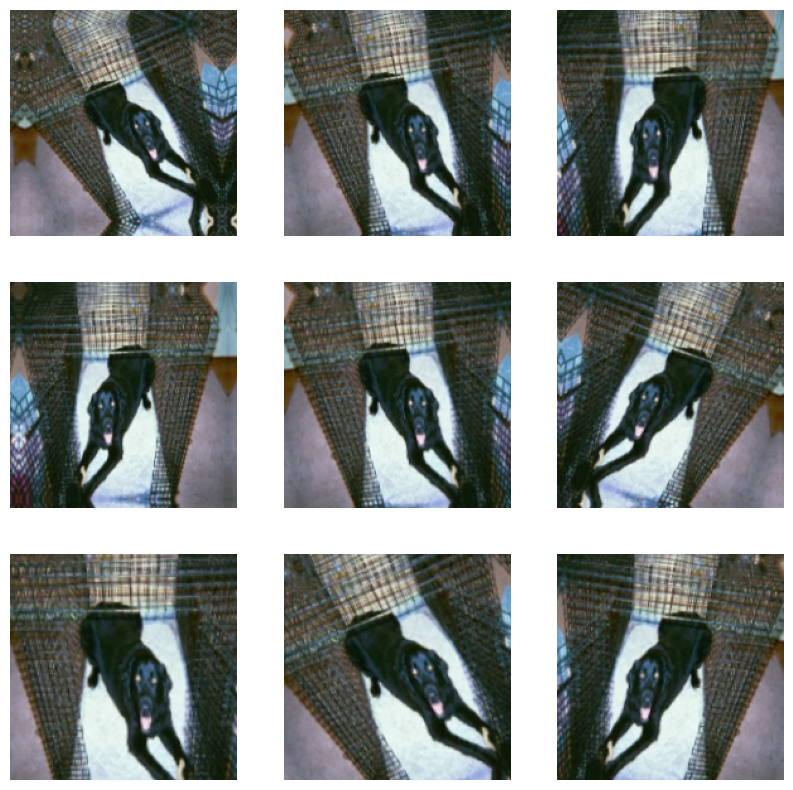

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss"), early_stopping_monitor
]
history = model.fit(
    train_ds,
    epochs=30,
    validation_data=val_ds,
    callbacks=callbacks)

Epoch 1/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 311ms/step - accuracy: 0.4481 - loss: 0.6971 - val_accuracy: 0.5000 - val_loss: 0.6928
Epoch 2/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 159ms/step - accuracy: 0.5278 - loss: 0.6926 - val_accuracy: 0.6333 - val_loss: 0.6880
Epoch 3/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 172ms/step - accuracy: 0.5687 - loss: 0.6919 - val_accuracy: 0.6317 - val_loss: 0.6606
Epoch 4/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 159ms/step - accuracy: 0.5563 - loss: 0.6871 - val_accuracy: 0.5750 - val_loss: 0.6594
Epoch 5/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 165ms/step - accuracy: 0.6050 - loss: 0.6625 - val_accuracy: 0.6483 - val_loss: 0.6229
Epoch 6/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 188ms/step - accuracy: 0.6514 - loss: 0.6195 - val_accuracy: 0.6583 - val_loss: 0.6029
Epoch 7/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 216ms/step - accuracy: 0.6586 - loss: 0.6131 - val_accuracy: 0.6567 - val_loss: 0.6232
Epoch 8/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 160ms/step - accuracy: 0.6673 - loss: 0.6035 - val_accuracy

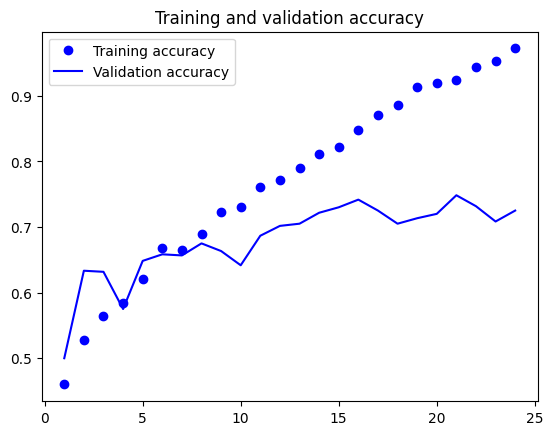

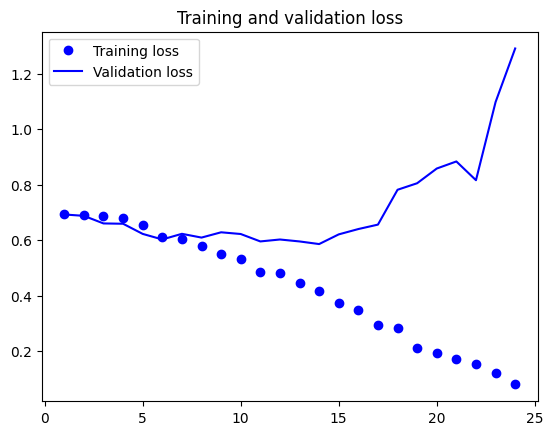

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.3f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.7144 - loss: 0.6254
Test accuracy: 0.720


**Model 3: Increasing the Training sample size to 1700**

In [ ]:
import os
import shutil
import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import image_dataset_from_directory

# 1. Function to Create Subsets
def make_subset(subset_name, original_dir, target_dataset_dir, start_index, end_index):
    print(f"\nCreating subset: {subset_name} from {original_dir} [{start_index}:{end_index}]")

    for category in ["cats", "dogs"]:
        src_dir = original_dir / category
        dest_dir = target_dataset_dir / subset_name / category

        if dest_dir.exists():
            shutil.rmtree(dest_dir)

        os.makedirs(dest_dir, exist_ok=True)

        files = sorted(os.listdir(src_dir))

        if end_index > len(files):
            print(f" end_index {end_index} exceeds available files ({len(files)}). Adjusting...")
            end_index = len(files)

        subset_files = files[start_index:end_index]

        print(f"Copying {len(subset_files)} files from {src_dir} to {dest_dir}...")

        for fname in subset_files:
            src_file = src_dir / fname
            dst_file = dest_dir / fname

            shutil.copyfile(src_file, dst_file)

    print(f"Subset '{subset_name}' created successfully!")

# 2. Paths Setup
source_train_dir = pathlib.Path("/content/drive/MyDrive/cats_vs_dogs_small/cats_vs_dogs_small_subset/train")
source_validation_dir = pathlib.Path("/content/drive/MyDrive/cats_vs_dogs_small/cats_vs_dogs_small_subset/validation")
source_test_dir = pathlib.Path("/content/drive/MyDrive/cats_vs_dogs_small/cats_vs_dogs_small_subset/test")

target_dataset_dir = pathlib.Path("/content/drive/MyDrive/cats_vs_dogs_small/cats_vs_dogs_small_subset")

# 3. Create Subsets
make_subset("train_4", source_train_dir, target_dataset_dir, 0, 850)
make_subset("validation_4", source_validation_dir, target_dataset_dir, 0, 250)
make_subset("test_4", 	source_test_dir, target_dataset_dir, 0, 250)

# 4. Load the Subset Datasets
train_ds_4 = image_dataset_from_directory(
    target_dataset_dir / "train_4",
    image_size=(180, 180),
    batch_size=32
)

val_ds_4 = image_dataset_from_directory(
    target_dataset_dir / "validation_4",
    image_size=(180, 180),
    batch_size=32
)

test_ds_4 = image_dataset_from_directory(
    target_dataset_dir / "test_4",
    image_size=(180, 180),
    batch_size=32
)

# 5. Define the Callbacks
early_stopping_monitor = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss"
    ),
    early_stopping_monitor
]

# 6. Build Your Model
model = keras.Sequential([
    keras.layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 7. Train the Model
history = model.fit(
    train_ds_4,
    epochs=30,
    validation_data=val_ds_4,
    callbacks=callbacks
)




Creating subset: train_4 from /content/drive/MyDrive/cats_vs_dogs_small/cats_vs_dogs_small_subset/train [0:850]
 end_index 850 exceeds available files (750). Adjusting...
Copying 750 files from /content/drive/MyDrive/cats_vs_dogs_small/cats_vs_dogs_small_subset/train/cats to /content/drive/MyDrive/cats_vs_dogs_small/cats_vs_dogs_small_subset/train_4/cats...
Copying 750 files from /content/drive/MyDrive/cats_vs_dogs_small/cats_vs_dogs_small_subset/train/dogs to /content/drive/MyDrive/cats_vs_dogs_small/cats_vs_dogs_small_subset/train_4/dogs...
Subset 'train_4' created successfully!

Creating subset: validation_4 from /content/drive/MyDrive/cats_vs_dogs_small/cats_vs_dogs_small_subset/validation [0:250]
Copying 250 files from /content/drive/MyDrive/cats_vs_dogs_small/cats_vs_dogs_small_subset/validation/cats to /content/drive/MyDrive/cats_vs_dogs_small/cats_vs_dogs_small_subset/validation_4/cats...
Copying 250 files from /content/drive/MyDrive/cats_vs_dogs_small/cats_vs_dogs_small_subse

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 27s 403ms/step - accuracy: 0.4801 - loss: 1.0577 - val_accuracy: 0.5540 - val_loss: 0.6909
Epoch 2/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 309ms/step - accuracy: 0.4838 - loss: 0.6925 - val_accuracy: 0.6320 - val_loss: 0.6469
Epoch 3/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 232ms/step - accuracy: 0.5761 - loss: 0.6697 - val_accuracy: 0.6820 - val_loss: 0.6006
Epoch 4/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 167ms/step - accuracy: 0.6900 - loss: 0.5832 - val_accuracy: 0.6500 - val_loss: 0.6293
Epoch 5/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step - accuracy: 0.7359 - loss: 0.5216 - val_accuracy: 0.6840 - val_loss: 0.6207
Epoch 6/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 146ms/step - accuracy: 0.7873 - loss: 0.4434 - val_accuracy: 0.6780 - val_loss: 0.6669


In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)


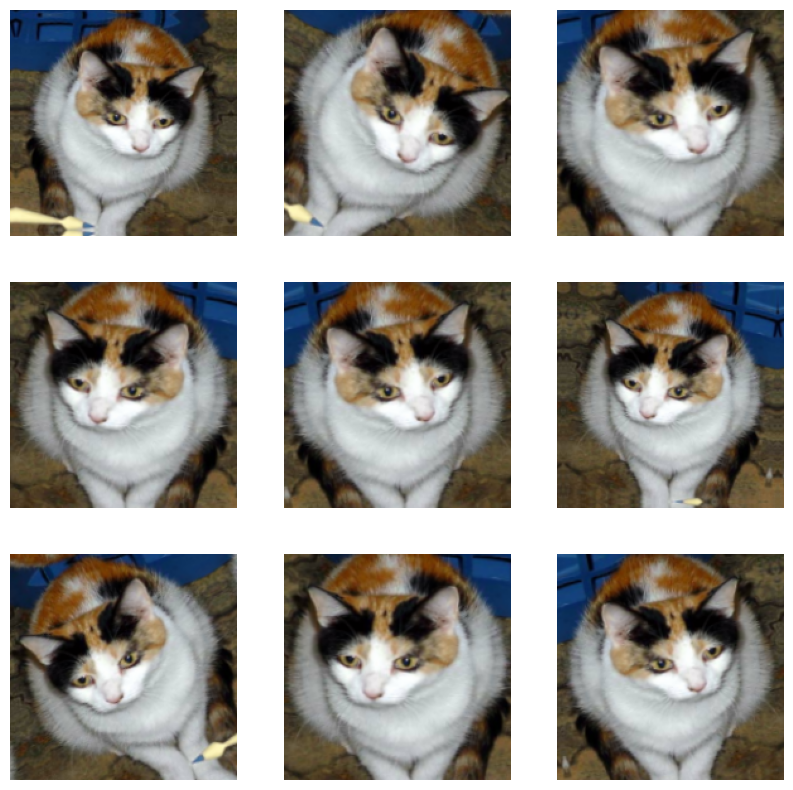

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

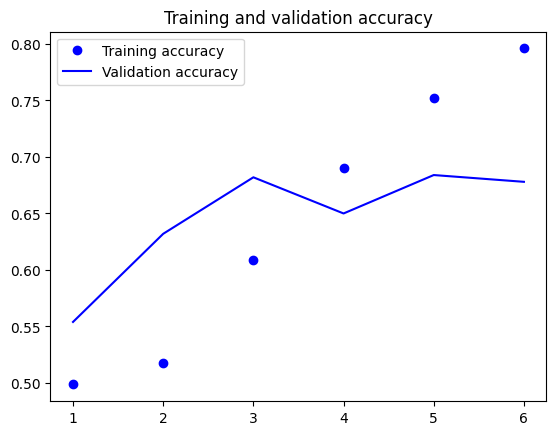

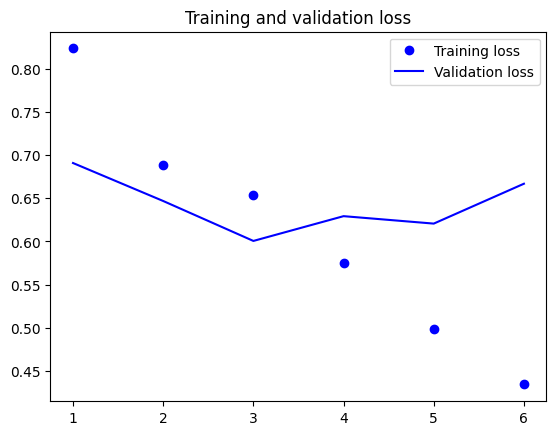

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_ds_4)
print(f"Test accuracy: {test_acc:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accuracy: 0.6496 - loss: 0.6409
Test accuracy: 0.642


**Feature extraction enhanced through data augmentation**

**Creating and locking the VGG16 convolutional base**

**Pre-Trained Model - 1000 Training samples**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 180, 180, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Adding a data augmentation stage and a classifier to the convolutional base**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_ds,
    epochs=30,
    validation_data=val_ds,
    callbacks=callbacks)

Epoch 1/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 269ms/step - accuracy: 0.6610 - loss: 6.2363 - val_accuracy: 0.9183 - val_loss: 0.6277
Epoch 2/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 195ms/step - accuracy: 0.8583 - loss: 1.2681 - val_accuracy: 0.9550 - val_loss: 0.3561
Epoch 3/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 177ms/step - accuracy: 0.8970 - loss: 0.8774 - val_accuracy: 0.9600 - val_loss: 0.2995
Epoch 4/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 203ms/step - accuracy: 0.9254 - loss: 0.5290 - val_accuracy: 0.9683 - val_loss: 0.2541
Epoch 5/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 201ms/step - accuracy: 0.9401 - loss: 0.3808 - val_accuracy: 0.9683 - val_loss: 0.2389
Epoch 6/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 187ms/step - accuracy: 0.9404 - loss: 0.3779 - val_accuracy: 0.9667 - val_loss: 0.2249
Epoch 7/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 178ms/step - accuracy: 0.9414 - loss: 0.2563 - val_accuracy: 0.9700 - val_loss: 0.2151
Epoch 8/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 193ms/step - accuracy: 0.9505 - loss: 0.2225 - val_accurac

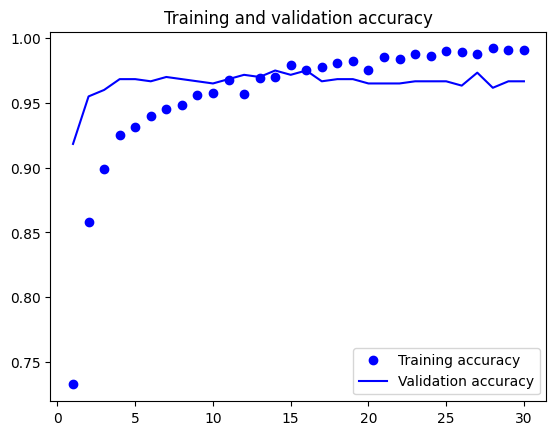

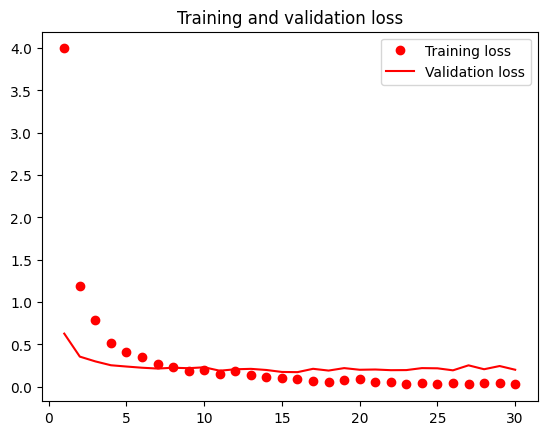

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "ro", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.3f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.9687 - loss: 0.2743
Test accuracy: 0.970


**Pre-Trained Model Utilizing 1500 Training Samples**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning2.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=callbacks)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 204ms/step - accuracy: 0.6683 - loss: 6.3828 - val_accuracy: 0.9000 - val_loss: 0.8866
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 243ms/step - accuracy: 0.8437 - loss: 1.4751 - val_accuracy: 0.9400 - val_loss: 0.3731
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 182ms/step - accuracy: 0.9082 - loss: 0.8091 - val_accuracy: 0.9600 - val_loss: 0.3230
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 202ms/step - accuracy: 0.9206 - loss: 0.7035 - val_accuracy: 0.9683 - val_loss: 0.2047
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 176ms/step - accuracy: 0.9348 - loss: 0.4545 - val_accuracy: 0.9717 - val_loss: 0.2107
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 180ms/step - accuracy: 0.9537 - loss: 0.2881 - val_accuracy: 0.9800 - val_loss: 0.1634
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 195ms/step - accuracy: 0.9514 - loss: 0.2768 - val_accuracy: 0.9800 - val_loss: 0.1604
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 185ms/step - accuracy: 0.9570 - loss: 0.2763 - val_accura

In [ ]:
model = keras.models.load_model("fine_tuning2.keras")
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.3f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.9713 - loss: 0.2675
Test accuracy: 0.970


**Pre-Trained Model Utilizing 1700 Training Samples**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning3.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_ds_4,
    epochs=10,
    validation_data=val_ds_4,
    callbacks=callbacks)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 264ms/step - accuracy: 0.6315 - loss: 7.2205 - val_accuracy: 0.8640 - val_loss: 1.4027
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 196ms/step - accuracy: 0.8256 - loss: 1.8493 - val_accuracy: 0.9260 - val_loss: 0.8396
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 196ms/step - accuracy: 0.8807 - loss: 0.9664 - val_accuracy: 0.9480 - val_loss: 0.5804
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 209ms/step - accuracy: 0.9222 - loss: 0.5705 - val_accuracy: 0.9520 - val_loss: 0.4556
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 206ms/step - accuracy: 0.9153 - loss: 0.4765 - val_accuracy: 0.9600 - val_loss: 0.3305
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 193ms/step - accuracy: 0.9342 - loss: 0.3163 - val_accuracy: 0.9700 - val_loss: 0.2439
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - accuracy: 0.9385 - loss: 0.2588 - val_accuracy: 0.9660 - val_loss: 0.2108
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 192ms/step - accuracy: 0.9484 - loss: 0.1915 - val_accura

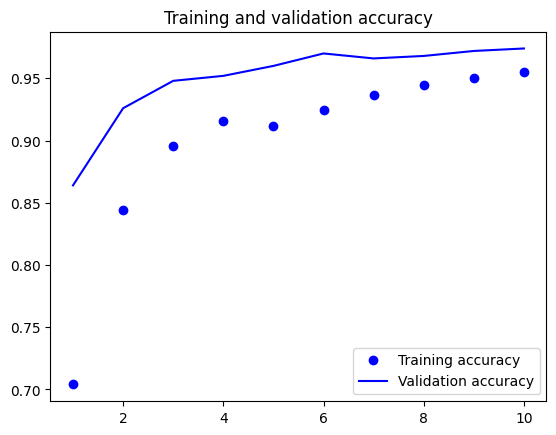

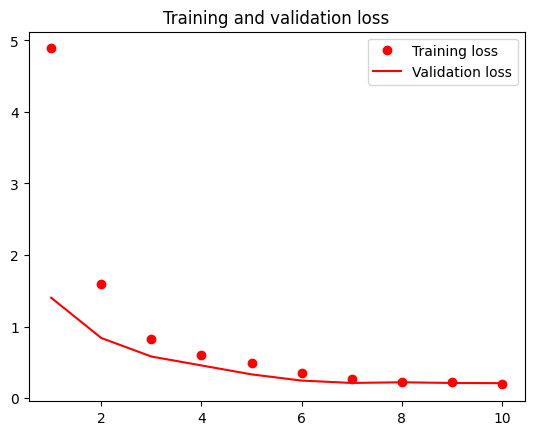

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "ro", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
model = keras.models.load_model("fine_tuning3.keras")
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.3f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9571 - loss: 0.2577
Test accuracy: 0.962
